In [28]:
import sqlite3
from scipy import signal, stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (11, 6)

Populating the interactive namespace from numpy and matplotlib


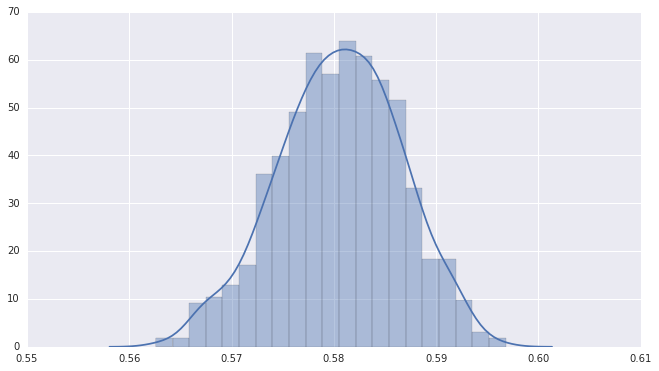

In [29]:
conn = sqlite3.connect('all_measures_walker.db')
c = conn.cursor()
row = c.execute("""SELECT tt_ratio FROM results WHERE test_train = 0 AND is_resample = 1""").fetchall()
x= [i[0] for i in row]
sns.distplot(x)

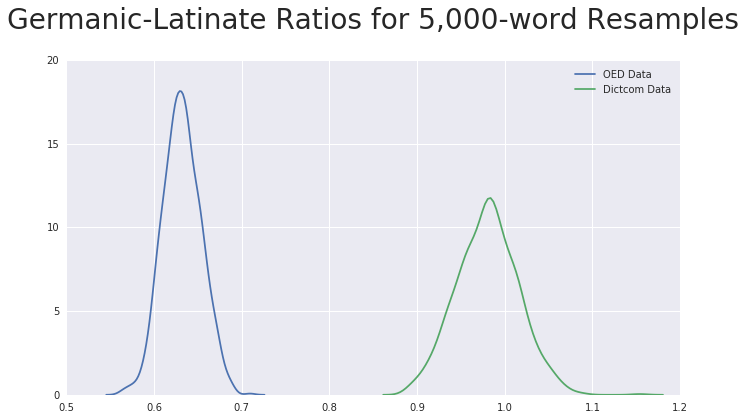

In [30]:
row = c.execute("""SELECT oed_ratio_no_set, gl_ratio_no_set, neo, oed_neo FROM results WHERE test_train = 0 AND is_resample = 1""").fetchall()
a =[i[0] for i in row]
b = [i[1] for i in row]
x = [float(i[2])/5000 for i in row]
y = [float(i[3])/5000 for i in row]
sns.distplot(a, hist=False, label="OED Data")
sns.distplot(b, hist=False, label="Dictcom Data")
sns.plt.title("Germanic-Latinate Ratios for 5,000-word Resamples", fontsize=28, y=1.08)

In [7]:
conn = sqlite3.connect('walker_ratios_data.db')
c = conn.cursor()
rows = c.execute("""SELECT walker_ratio_no_set, year FROM results 
    WHERE genre='all_genres' and no_data=0 and too_short=0""").fetchall()
poetry = c.execute("""SELECT walker_ratio_no_set, year FROM results 
    WHERE genre='poetry' and no_data=0 and too_short=0""").fetchall()
fiction = c.execute("""SELECT walker_ratio_no_set, year FROM results 
    WHERE genre='fiction' and no_data=0 and too_short=0""").fetchall()
nonfiction = c.execute("""SELECT walker_ratio_no_set, year FROM results 
    WHERE genre='nonfiction' and no_data=0 and too_short=0""").fetchall()
drama = c.execute("""SELECT walker_ratio_no_set, year FROM results 
    WHERE genre='drama' and no_data=0 and too_short=0""").fetchall()

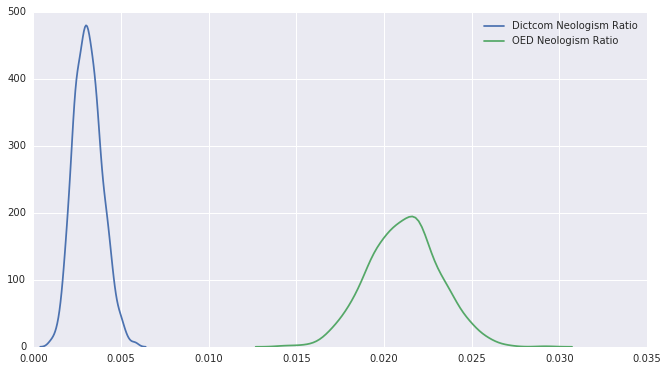

In [32]:
sns.distplot(x, hist=False, label="Dictcom Neologism Ratio")
sns.distplot(y, hist=False, label="OED Neologism Ratio")

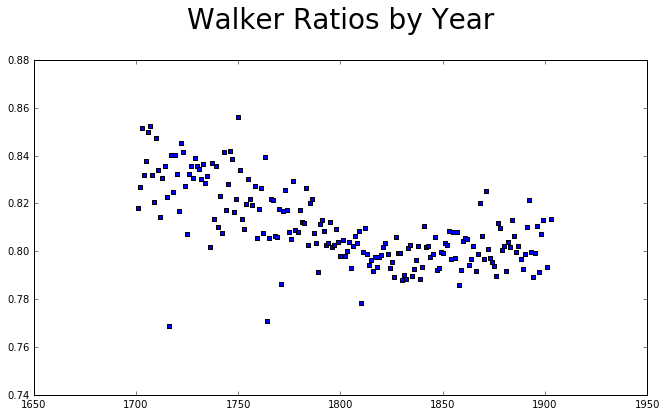

In [8]:
y = [i[0] for i in rows] 
x = [i[1] for i in rows]
plt.title("Walker Ratios by Year", fontsize=28, y=1.08)
plt.scatter(x,y, c='b', marker="s",)


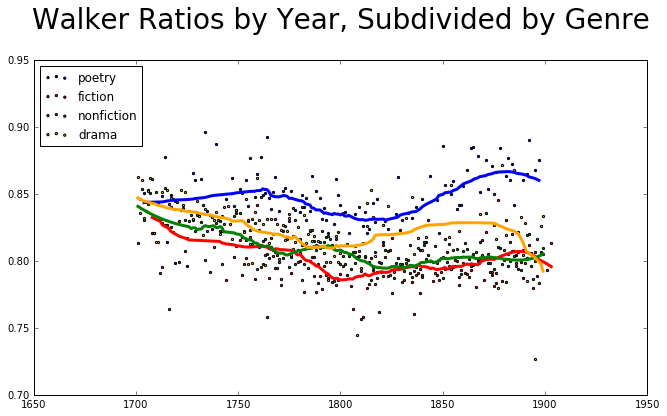

In [9]:
y_1 = [i[0] for i in poetry] 
x_1 = [i[1] for i in poetry]
y_2 = [i[0] for i in fiction] 
x_2 = [i[1] for i in fiction]
y_3 = [i[0] for i in nonfiction]
x_3 = [i[1] for i in nonfiction]
y_4 = [i[0] for i in drama]
x_4 = [i[1] for i in drama]
y_1_sav = signal.savgol_filter(y_1, 51, 3) # window size 51, polynomial order 3
y_2_sav = signal.savgol_filter(y_2, 51, 3)
y_3_sav = signal.savgol_filter(y_3, 51, 3)
y_4_sav = signal.savgol_filter(y_4, 51, 3)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_1, y_1, s=5, c='b', marker="o", label='poetry')
ax1.scatter(x_2,y_2, s=5, c='r', marker="o", label='fiction')
ax1.scatter(x_3,y_3, s=5, c='g', marker="o", label='nonfiction')
ax1.scatter(x_4,y_4, s=5, c='orange', marker="o", label='drama')
plt.title("Walker Ratios by Year, Subdivided by Genre", fontsize=28, y=1.08)
plt.plot(x_1, y_1_sav, linewidth=3.0, c="b")
plt.plot(x_2, y_2_sav, linewidth=3.0, c="r")
plt.plot(x_3, y_3_sav, linewidth=3.0, c="g")
plt.plot(x_4, y_4_sav, linewidth=3.0, c="orange")
plt.legend(loc='upper left');
plt.show()

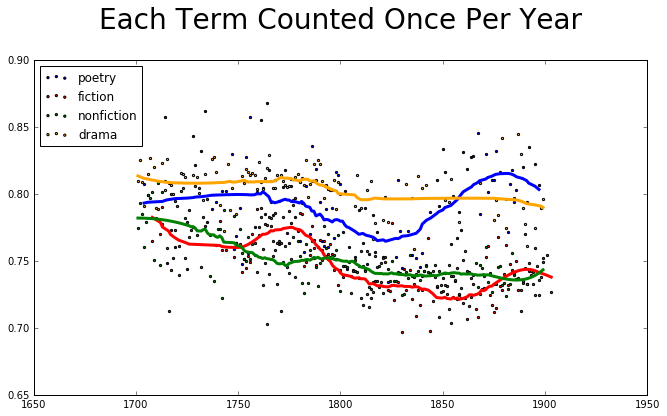

In [10]:
poetry = c.execute("""SELECT walker_ratio_set, year FROM results 
    WHERE genre='poetry' and no_data=0 and too_short=0""").fetchall()
fiction = c.execute("""SELECT walker_ratio_set, year FROM results 
    WHERE genre='fiction' and no_data=0 and too_short=0""").fetchall()
nonfiction = c.execute("""SELECT walker_ratio_set, year FROM results 
    WHERE genre='nonfiction' and no_data=0 and too_short=0""").fetchall()
drama = c.execute("""SELECT walker_ratio_set, year FROM results 
    WHERE genre='drama' and no_data=0 and too_short=0""").fetchall()
y_1 = [i[0] for i in poetry] 
x_1 = [i[1] for i in poetry]
y_2 = [i[0] for i in fiction] 
x_2 = [i[1] for i in fiction]
y_3 = [i[0] for i in nonfiction]
x_3 = [i[1] for i in nonfiction]
y_4 = [i[0] for i in drama]
x_4 = [i[1] for i in drama]
y_1_sav = signal.savgol_filter(y_1, 51, 3) # window size 51, polynomial order 3
y_2_sav = signal.savgol_filter(y_2, 51, 3)
y_3_sav = signal.savgol_filter(y_3, 51, 3)
y_4_sav = signal.savgol_filter(y_4, 51, 3)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_1, y_1, s=5, c='b', marker="o", label='poetry')
ax1.scatter(x_2,y_2, s=5, c='r', marker="o", label='fiction')
ax1.scatter(x_3,y_3, s=5, c='g', marker="o", label='nonfiction')
ax1.scatter(x_4,y_4, s=5, c='orange', marker="o", label='drama')
plt.title("Each Term Counted Once Per Year", fontsize=28, y=1.08)
plt.plot(x_1, y_1_sav, linewidth=3.0, c="b")
plt.plot(x_2, y_2_sav, linewidth=3.0, c="r")
plt.plot(x_3, y_3_sav, linewidth=3.0, c="g")
plt.plot(x_4, y_4_sav, linewidth=3.0, c="orange")
plt.legend(loc='upper left');
plt.show()

In [11]:
import json
poetry_json = c.execute("""SELECT walker_resample_set, year FROM results 
    WHERE genre='poetry' and no_data=0 and too_short=0""").fetchall()
fiction_json = c.execute("""SELECT walker_resample_set, year 
    FROM results WHERE genre='fiction' and no_data=0 and too_short=0""").fetchall()
nonfiction_json = c.execute("""SELECT walker_resample_set, year FROM results 
    WHERE genre='nonfiction' and no_data=0 and too_short=0""").fetchall()
drama_json = c.execute("""SELECT walker_resample_set, year 
    FROM results WHERE genre='drama' and no_data=0 and too_short=0""").fetchall()

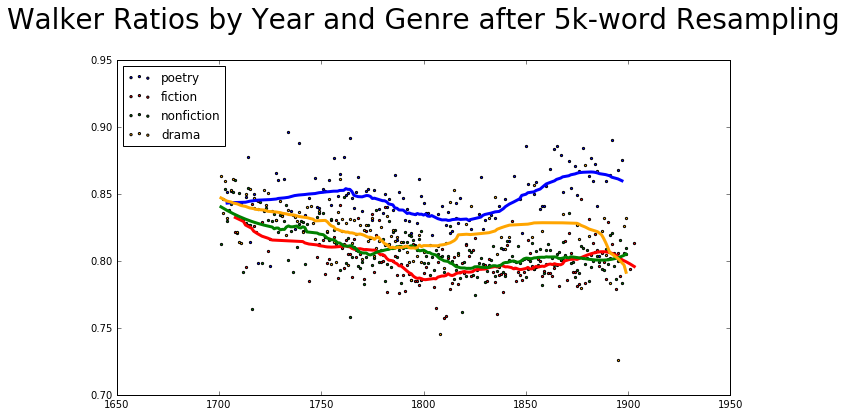

In [14]:
p = [json.loads(i[0]) for i in poetry_json]
f = [json.loads(i[0]) for i in fiction_json]
n= [json.loads(i[0]) for i in nonfiction_json]
d = [json.loads(i[0]) for i in drama_json]

y_1 = [sum(i)/len(i) for i in p]
y_2 = [sum(i)/len(i) for i in f]
y_3 = [sum(i)/len(i) for i in n]
y_4 = [sum(i)/len(i) for i in d]

x_1 = [i[1] for i in poetry_json]
x_2 = [i[1] for i in fiction_json]
x_3 = [i[1] for i in nonfiction_json]
x_4 = [i[1] for i in drama_json]

y_1_sav = signal.savgol_filter(y_1, 51, 3) # window size 51, polynomial order 3
y_2_sav = signal.savgol_filter(y_2, 51, 3)
y_3_sav = signal.savgol_filter(y_3, 51, 3)
y_4_sav = signal.savgol_filter(y_4, 51, 3)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_1, y_1, s=5, c='b', marker="o", label='poetry')
ax1.scatter(x_2,y_2, s=5, c='r', marker="o", label='fiction')
ax1.scatter(x_3,y_3, s=5, c='g', marker="o", label='nonfiction')
ax1.scatter(x_4,y_4, s=5, c='orange', marker="o", label='drama')
plt.title("Walker Ratios by Year and Genre after 5k-word Resampling", fontsize=28, y=1.08)
plt.plot(x_1, y_1_sav, linewidth=3.0, c="b")
plt.plot(x_2, y_2_sav, linewidth=3.0, c="r")
plt.plot(x_3, y_3_sav, linewidth=3.0, c="g")
plt.plot(x_4, y_4_sav, linewidth=3.0, c="orange")

plt.legend(loc='upper left');
plt.show()

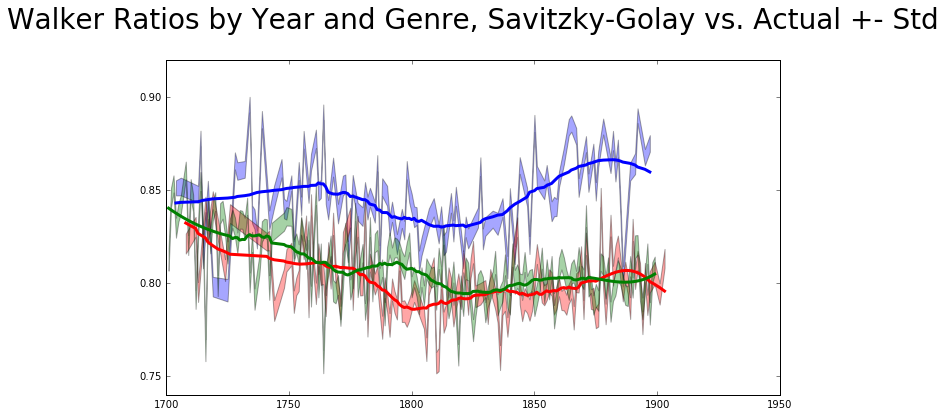

In [15]:
std_p = [np.std(i) for i in p] 
std_f = [np.std(i) for i in f]
std_n = [np.std(i) for i in n]
std_d = [np.std(i) for i in d]

plt.title("Walker Ratios by Year and Genre, Savitzky-Golay vs. Actual +- Std", fontsize=28, y=1.08)
plt.fill_between(x_1, np.asarray(y_1)-std_p, np.asarray(y_1)+std_p,facecolor='b',alpha=0.35)
plt.fill_between(x_2, np.asarray(y_2)-std_f, np.asarray(y_2)+std_f,facecolor='r',alpha=0.35)
plt.fill_between(x_3, np.asarray(y_3)-std_n, np.asarray(y_3)+std_n,facecolor='g',alpha=0.35)

plt.plot(x_1, y_1_sav, linewidth=3.0, c="b")
plt.plot(x_2, y_2_sav, linewidth=3.0, c="r")
plt.plot(x_3, y_3_sav, linewidth=3.0, c="g")

plt.show()